# Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

<h1>План урока<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1">Масштабирование признаков</a></span><ul class="toc-item"><li><span><a href="#Нормализация-[0,-1]" data-toc-modified-id="Нормализация-[0,-1]-1.1">Нормализация [0, 1]</a></span></li><li><span><a href="#Стандартизация" data-toc-modified-id="Стандартизация-1.2">Стандартизация</a></span></li></ul></li><li><span><a href="#Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск" data-toc-modified-id="Стохастический-градиентный-спуск-и-mini-batch-градиентный-спуск-2">Стохастический градиентный спуск и mini-batch градиентный спуск</a></span></li><li><span><a href="#Регуляризация" data-toc-modified-id="Регуляризация-3">Регуляризация</a></span><ul class="toc-item"><li><span><a href="#L1-регуляризация---Lasso" data-toc-modified-id="L1-регуляризация---Lasso-3.1">L1 регуляризация - Lasso</a></span></li><li><span><a href="#L2-регуляризация---Ridge" data-toc-modified-id="L2-регуляризация---Ridge-3.2">L2 регуляризация - Ridge</a></span></li></ul></li><li><span><a href="#Домашние-задания" data-toc-modified-id="Домашние-задания-4">Домашние задания</a></span></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14,
                     'xtick.labelsize': 14})

## Масштабирование признаков

In [2]:
# К признаку стажа добавим новые признаки
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]]).T  # возраст репетитора
               
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]    # средний балл ЕГЭ (целевая переменная)

In [3]:
# веса по МНК
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([ 5.31431473e+01,  5.13381190e+00,  6.37461212e-03, -5.44708363e-01])

In [4]:
X_1 = [1, 1, 1, 1]
X_2 = [1, 2, 1, 1]

X_2 @ w - X_1 @ w

5.133811898155592

### Нормализация [0, 1]

In [5]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [6]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 2.10e+01],
       [1.00e+00, 1.00e+00, 7.00e+02, 2.50e+01],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.70e+01],
       [1.00e+00, 1.00e+00, 6.00e+02, 2.00e+01],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.50e+01],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.80e+01],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.50e+01],
       [1.00e+00, 1.00e+01, 2.00e+03, 6.00e+01],
       [1.00e+00, 1.00e+00, 4.50e+02, 2.00e+01],
       [1.00e+00, 2.00e+00, 1.00e+03, 3.00e+01]])

$$x_{ij} = \frac{x_{ij} - min_{j} (x_{ij})}{max_{j} (x_{ij})-min_{j} (x_{ij})}$$

In [8]:
X_norm[:, 1] = (X[:, 1] - X[:, 1].min()) / (X[:, 1].max() - X[:, 1].min())
X_norm[:, 1]

array([0.1, 0.1, 0.2, 0.1, 0.3, 0. , 0.5, 1. , 0.1, 0.2])

In [9]:
X_norm[:, 2] = (X[:, 2] - X[:, 2].min()) / (X[:, 2].max() - X[:, 2].min())
X_norm[:, 2]

array([0.03225806, 0.16129032, 0.19354839, 0.09677419, 0.64516129,
       0.22580645, 0.67741935, 1.        , 0.        , 0.35483871])

In [10]:
X_norm[:, 3] = (X[:, 3] - X[:, 3].min()) / (X[:, 3].max() - X[:, 3].min())
X_norm[:, 3]

array([0.07142857, 0.16666667, 0.21428571, 0.04761905, 0.16666667,
       0.        , 0.4047619 , 1.        , 0.04761905, 0.28571429])

### Стандартизация

$$s_{ij}=\frac{x_{ij} - \mu_{j}}{\sigma_{j}}$$

In [11]:
X_st = X.copy().astype(np.float64)

X_st[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
X_st[:, 1]

array([-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
       -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571])

In [12]:
X_st[:, 1].mean(), X_st[:, 1].std()

(3.3306690738754695e-17, 1.0)

In [13]:
def standardization(x: np.ndarray) -> np.ndarray:
    '''Функция принимает и возвращает одномерный массив'''
    s = (x - x.mean()) / x.std()
    return s

In [14]:
X_st[:, 2] = standardization(X[:, 2])
X_st[:, 3] = standardization(X[:, 3])
print(X_st[:, 2])
print(X_st[:, 3])

[-0.97958969 -0.56713087 -0.46401617 -0.77336028  0.97958969 -0.36090146
  1.08270439  2.11385144 -1.08270439  0.05155735]
[-0.60595294 -0.264571   -0.09388003 -0.69129842 -0.264571   -0.86198939
  0.58888384  2.72252095 -0.69129842  0.16215642]


In [15]:
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

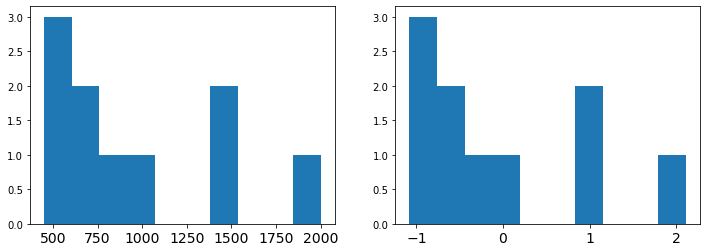

In [15]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X[:, 2]);

plt.subplot(1, 2, 2)
plt.hist(X_st[:, 2]);

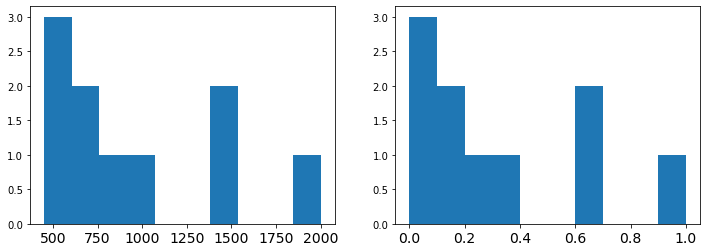

In [16]:
fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X[:, 2]);

plt.subplot(1, 2, 2)
plt.hist(X_norm[:, 2]);

In [17]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

# Метод градиентного спуска
def eval_GD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [18]:
np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y

array([57.4       , 14.37467331,  3.09102963, -6.38239231])

In [19]:
w_sq_st = np.linalg.inv(X_st.T @ X_st) @ X_st.T @ y
y_pred = np.dot(X_st, w_sq_st)
err_sq = calc_mse(y, y_pred)
print(f'MSE для МНК для данных после стандартизации \t- {err_sq}\n')

w_sq = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = np.dot(X, w_sq)
err = calc_mse(y, y_pred)
print(f'MSE для МНК для данных БЕЗ стандартизации \t- {err}\n')

MSE для МНК для данных после стандартизации 	- 41.005760899682606

MSE для МНК для данных БЕЗ стандартизации 	- 41.005760899682585



In [20]:
w_gd_st = eval_GD(X_st, y, iterations=1500, eta=1e-2)
y_pred = np.dot(X_st, w_gd_st)
err_st = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных после стандартизации - {err_st}\n')

# Градиентный спуск на данных без стандартизации не сходится! 
w_gd = eval_GD(X, y, iterations=1500, eta=1e-2)
y_pred = np.dot(X, w_gd)
err_gd = calc_mse(y, y_pred)
print(f'MSE для метода градиентного спуска для данных БЕЗ стандартизации - {err_gd}\n')

150: weights=[54.6517977   3.4588195   4.35039355  3.49661408], MSE=53.643
300: weights=[57.26727276  3.96125574  4.72381728  2.6236804 ], MSE=45.021
450: weights=[57.3935898   4.4847313   4.90444633  1.91537476], MSE=44.461
600: weights=[57.39969041  5.00911051  4.9692014   1.31887791], MSE=44.036
750: weights=[57.39998505  5.52235732  4.96511334  0.80068137], MSE=43.681
900: weights=[57.39999928  6.01771784  4.92107033  0.33955253], MSE=43.374
1050: weights=[57.39999997  6.49166101  4.85476482 -0.0781283 ], MSE=43.105
1200: weights=[57.4         6.94260898  4.7769834  -0.46124959], MSE=42.867
1350: weights=[57.4         7.37015514  4.69425574 -0.81575008], MSE=42.657
1500: weights=[57.4         7.77458325  4.61049007 -1.14572061], MSE=42.470
MSE для метода градиентного спуска для данных после стандартизации - 42.468894653910056

150: weights=[nan nan nan nan], MSE=nan
300: weights=[nan nan nan nan], MSE=nan
450: weights=[nan nan nan nan], MSE=nan
600: weights=[nan nan nan nan], MSE=n

C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
C:\Users\User\Anaconda3\envs\py37_64\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


## Стохастический градиентный спуск и mini-batch градиентный спуск

На каждом шаге итерации градиентный спуск вычисляет градиенты для всего обучающего набора, стохастический градиентный спуск вычисляет градиент для одного объекта, а mini-batch градиентный спуск будет отбирать небольшой набор данных (batch) и по ним вычислять градиент.

In [21]:
# SGD - стохастический градиентный спуск
def eval_SGD(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= eta * (2 * np.dot(X[ind].T, (y_pred - y[ind])))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err

In [22]:
# mini-batch градиентный спуск
def eval_mbGD(X, y, iterations, batch=1, eta=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    n_batch = n // batch # число батчей
    if n % batch != 0:
        n_batch += 1
    print('Количество батчей - ', n_batch)
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        for b in range(n_batch):
            start_ = batch * b
            end_ = batch * (b + 1)
            X_batch = X[start_ : end_, :]
            y_batch = y[start_ : end_]
            y_pred = np.dot(X_batch, w)
            w -= eta * (2/len(y_batch) * np.dot(X_batch.T, (y_pred - y_batch)))
        if i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w, err

In [23]:
%%time

w = eval_GD(X_st, y, iterations=1000, eta=1e-3)

100: weights=[10.82085913  1.25017246  2.00872427  2.7761629 ], MSE=2251.619
200: weights=[19.27186149  2.05101507  2.8052641   3.45292497], MSE=1514.940
300: weights=[26.18957149  2.51825162  3.28026624  3.80293424], MSE=1027.491
400: weights=[31.85217926  2.7961546   3.57177353  3.96796979], MSE=702.844
500: weights=[36.48740201  2.96667168  3.75822973  4.02855216], MSE=485.930
600: weights=[40.28164149  3.07634656  3.88422185  4.03040398], MSE=340.766
700: weights=[43.38747997  3.1516116   3.97510342  3.99948108], MSE=243.540
800: weights=[45.92981625  3.20747495  4.04530137  3.95051114], MSE=178.389
900: weights=[48.01088834  3.25245533  4.10303492  3.89184409], MSE=134.717
1000: weights=[49.71438487  3.29138533  4.15299613  3.82820742], MSE=105.433
Wall time: 64 ms


In [24]:
%%time

w = eval_SGD(X_st, y, iterations=1000, eta=1e-3) 

100: weights=[11.07823354  2.65679552  3.08558565  4.25756046], MSE=2205.712
200: weights=[19.43052019  2.79985598  3.26331547  4.02074155], MSE=1493.199
300: weights=[26.16290329  2.94995959  2.7520469   3.94656817], MSE=1030.222
400: weights=[31.85323142  3.333731    3.3889441   4.39368236], MSE=702.843
500: weights=[36.69429663  3.28437258  3.51475655  4.25535627], MSE=478.007
600: weights=[40.45751857  3.02160859  3.44342985  3.77145543], MSE=335.378
700: weights=[43.38107482  3.13839146  3.8530924   3.74796712], MSE=243.026
800: weights=[45.87144601  3.31696666  4.02800762  3.94212551], MSE=179.806
900: weights=[47.78396245  3.2799294   3.90215483  3.80780503], MSE=139.233
1000: weights=[49.46236826  3.40631215  4.00616371  3.8085781 ], MSE=109.696
Wall time: 88.9 ms


In [25]:
%%time

w = eval_mbGD(X_st, y, iterations=1000, batch=10, eta=1e-3) 

Количество батчей -  1
100: weights=[10.82085913  1.25017246  2.00872427  2.7761629 ], MSE=2251.619
200: weights=[19.27186149  2.05101507  2.8052641   3.45292497], MSE=1514.940
300: weights=[26.18957149  2.51825162  3.28026624  3.80293424], MSE=1027.491
400: weights=[31.85217926  2.7961546   3.57177353  3.96796979], MSE=702.844
500: weights=[36.48740201  2.96667168  3.75822973  4.02855216], MSE=485.930
600: weights=[40.28164149  3.07634656  3.88422185  4.03040398], MSE=340.766
700: weights=[43.38747997  3.1516116   3.97510342  3.99948108], MSE=243.540
800: weights=[45.92981625  3.20747495  4.04530137  3.95051114], MSE=178.389
900: weights=[48.01088834  3.25245533  4.10303492  3.89184409], MSE=134.717
1000: weights=[49.71438487  3.29138533  4.15299613  3.82820742], MSE=105.433
Wall time: 77 ms


## Регуляризация

### L1 регуляризация - Lasso

$$\sum^{n}_{i=1}L_i(\vec{x}_i,{y_i},\vec{w}) + \lambda \sum^{m}_{j=1}|w_{j}| \rightarrow \underset{w}{\text{min}}$$

### L2 регуляризация - Ridge

$$\sum^{n}_{i=1}L_i(\vec{x}_i,y_i,\vec{w}) + \lambda \sum^{m}_{j=1}w_{j}^{2} \rightarrow \underset{w}{\text{min}}$$

In [26]:
def eval_model_reg2(X, y, iterations, eta=1e-4, lambda_=1e-8, verbose=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        w -= eta * (1/n * 2 * np.dot(X.T, (y_pred - y)) + 2 * lambda_ * w)
        if verbose and i % (iterations / 10) == 0:
            print(f'{i}: weights={w}, MSE={err:.3f}')
    return w

In [27]:
w = eval_model_reg2(X_st, y, iterations=1000, eta=1e-3, lambda_=0, verbose=True)

100: weights=[10.82085913  1.25017246  2.00872427  2.7761629 ], MSE=2251.619
200: weights=[19.27186149  2.05101507  2.8052641   3.45292497], MSE=1514.940
300: weights=[26.18957149  2.51825162  3.28026624  3.80293424], MSE=1027.491
400: weights=[31.85217926  2.7961546   3.57177353  3.96796979], MSE=702.844
500: weights=[36.48740201  2.96667168  3.75822973  4.02855216], MSE=485.930
600: weights=[40.28164149  3.07634656  3.88422185  4.03040398], MSE=340.766
700: weights=[43.38747997  3.1516116   3.97510342  3.99948108], MSE=243.540
800: weights=[45.92981625  3.20747495  4.04530137  3.95051114], MSE=178.389
900: weights=[48.01088834  3.25245533  4.10303492  3.89184409], MSE=134.717
1000: weights=[49.71438487  3.29138533  4.15299613  3.82820742], MSE=105.433


Веса без регуляризации: [49.71438487  3.29138533  4.15299613  3.82820742]

Визуализируем изменение весов при изменении коэффициента регуляризации.

In [28]:
w_list = []
l_list = []
error_list = []

for l in np.logspace(start=-4, stop=1, num=20):
    l_list.append(l)
    w_new = eval_model_reg2(X_st, y, iterations=1000, eta=1e-2, lambda_=l)
    w_list.append(w_new)
    error_list.append(calc_mse(y, np.dot(X_st, w_new)))
weights = np.array(w_list)
errors = np.array(error_list)

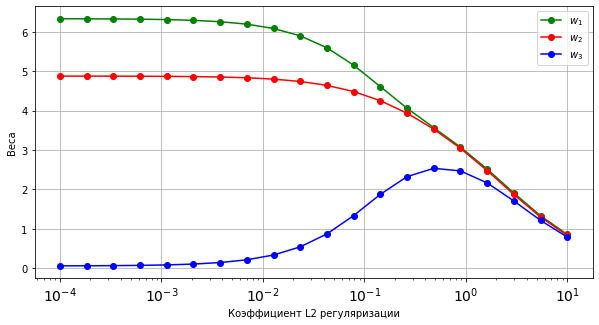

In [29]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
#plt.plot(l_list, weights[:, 0], 'mo-', label=r'$w_0$')
plt.plot(l_list, weights[:, 1], 'go-', label=r'$w_1$')
plt.plot(l_list, weights[:, 2], 'ro-', label=r'$w_2$')
plt.plot(l_list, weights[:, 3], 'bo-', label=r'$w_3$')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('Веса')
plt.grid()
plt.legend();

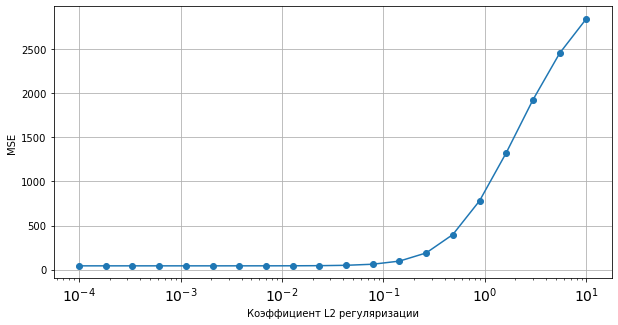

In [30]:
plt.figure(figsize=(10, 5))
plt.xscale('log')
plt.plot(l_list, errors, 'o-')
plt.xlabel('Коэффициент L2 регуляризации')
plt.ylabel('MSE')
plt.grid();

## Домашние задания

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного спуска и  стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.
2. [\*] Добавить в алгоритм градиентного спуска L1 регуляризацию. Сравнить влияние коэффициентов регуляризации L1 и L2 на величину весов для примера из урока (лучше графически).  


In [31]:
from sklearn import datasets

X_, y_, coef = datasets.make_regression(n_samples=1000, 
                                      n_features=2, 
                                      n_informative=2, 
                                      n_targets=1,
                                      noise=5, 
                                      coef=True, 
                                      random_state=42)

In [32]:
coef

array([40.71064891,  6.60098441])